# 서포트 벡터 머신_연습

### step0. 패키지 불러오기

In [1]:
#패키지 불러오기 
import pandas as pd 

#데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

#데이터 scaling
from sklearn.preprocessing import StandardScaler

#데이터 분할;train,test
from sklearn.model_selection import train_test_split

#분류SVM
from sklearn.svm import SVC

#최적 모델, 파라미터 검색
from sklearn.model_selection import GridSearchCV

#모델 성능 평가
from sklearn.metrics import confusion_matrix

### step1. 데이터 구성하기

In [2]:
df_raw=pd.read_csv("/home/piai/Desktop/최종/insu_pre_review.csv", engine='python', encoding='EUC-KR')
df_raw.head()

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
0,C112346,혈액검사,재검,2014-10-09,1,70,165,63,92.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C112350,일반검진,재검,2014-11-18,1,69,178,75,99.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C112355,일반검진,재검,2015-03-18,1,70,169,69,96.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C112356,혈액검사,재검,2015-09-28,1,70,165,64,103.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
df_raw_blood=df_raw[df_raw["review_cat"]=="혈액검사"]

In [4]:
df_raw_blood["judge"][df_raw_blood["judge"]=='재검']=0
df_raw_blood["judge"][df_raw_blood["judge"]=='승인']=0
df_raw_blood["judge"][df_raw_blood["judge"]=='거절']=1

<ipython-input-4-c825a8209013>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["judge"][df_raw_blood["judge"]=='재검']=0
/home/piai/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-4-c825a8209013>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["judge"][df_raw_blood["judge"]=='승인']=0
<ipython-input-4-c

In [5]:
df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='NEGATIVE']=1
df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='POSITIVE']=0

<ipython-input-5-ccb828b7e37f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='NEGATIVE']=1
<ipython-input-5-ccb828b7e37f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='POSITIVE']=0


In [6]:
df_raw_blood_man=df_raw_blood[df_raw_blood["gender"]==1]

In [7]:
df_raw_blood_man=df_raw_blood_man.drop(["customer_id","review_cat","review_date","gender","bust","bp_max","bp_min",\
                                        "pulse_count","judge_score","bt_chol_judge","bt_crea_judge","bt_gluc_judge","bt_hb_judge",\
                                        "bt_hbsa_judge","bt_hct_judge","bt_mch_judge","bt_mchc_judge","bt_mvc_judge","bt_plat_judge",\
                                        "bt_rbc_judge","bt_wbc_judge","bt_rgpt_judge","bt_sgot_judge","bt_sgpt_judge","bt_trig_judge"],axis=1)

In [8]:
df_raw_blood_man.dropna(inplace=True)

In [9]:
df_raw_blood_man["judge"] = df_raw_blood_man["judge"].astype(int)

In [10]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy=pd.get_dummies(df_raw_blood_man)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,judge,age,height,weight,waist,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hct,...,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,bp_judge,pulse_count_judge,bt_hbsa_0,bt_hbsa_1
5,0,70,169,70,90.0,223.0,1.0,72.0,16.9,50.3,...,519.0,7500.0,45.0,23.0,30.0,169.0,1,0,0,1
20,0,69,170,70,86.0,202.0,1.0,111.0,15.0,47.4,...,453.0,4800.0,34.0,22.0,20.0,70.0,0,0,0,1
29,0,69,170,65,84.0,192.0,1.0,73.0,14.5,43.9,...,480.0,6200.0,25.0,13.0,13.0,150.0,1,0,0,1
31,0,69,178,77,83.0,177.0,1.0,80.0,15.1,45.6,...,474.0,6500.0,34.0,20.0,21.0,78.0,0,0,0,1
43,0,69,169,68,89.0,235.0,0.8,85.0,12.1,39.0,...,392.0,6700.0,29.0,21.0,23.0,88.0,0,0,0,1


In [11]:
#데이터 구성하기 -데이터 분할
df_raw_y=df_raw_dummy["judge"]
df_raw_x=df_raw_dummy.drop(["judge"], axis=1,inplace=False)

In [12]:
# 데이터 분할 
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
df_train_x,df_validation_x,df_train_y,df_validation_y=train_test_split(df_train_x,df_train_y,test_size=3/7,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
print("validation data X size : {}".format(df_validation_x.shape))
print("validation data Y size : {}".format(df_validation_y.shape))

train data X size : (858, 23)
train data Y size : (858,)
test data X size : (644, 23)
test data Y size : (644,)
validation data X size : (644, 23)
validation data Y size : (644,)


### step2: SVC 모델 생성

In [13]:
#SCV모델 생성
svm_uncustomized=SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)
#train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
#test 데이터 셋 정확도
print("Accuracy on test set:{:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:0.772
Accuracy on test set:0.762


In [14]:
#현재 생성된 그래디언트 부스팅 모델의 옵션확인
svm_uncustomized

SVC(random_state=1234)

### step2: SVC 모델 Parameter 변경

- C: 규제에 대한 강도 변경

In [15]:
#모델 parameter 조정
#C; 규제에 대한 강도 변경
#train 및 test 정확도 결과 저장용
train_accuracy =[]; test_accuracy=[]
#lc; 규제 (0.01,0.1,1,10)
para_c=[10**c for c in range(-2,2)]
for v_C in para_c:
    svm=SVC(C=v_C,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
#데이터 테이블로 저장 
df_accuracy_c=pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["TrainAccuracy"]=train_accuracy
df_accuracy_c["TestAccuracy"]=test_accuracy
#C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.772,0.762
1,0.10,0.772,0.762
2,1.00,0.772,0.762
3,10.00,0.772,0.762


- C: 규제에 대한 강도 변경 결과

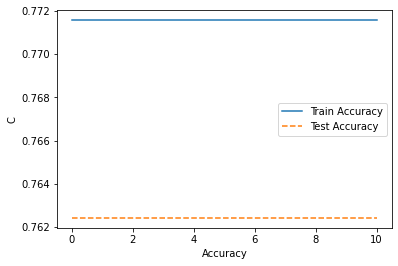

In [16]:
#C별 정확도 그래프로 확인
plt.plot(para_c,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_c,test_accuracy,linestyle="--",label="Test Accuracy")
plt.xlabel("Accuracy"); plt.ylabel("C")
plt.legend()

- Gamma: 훈련 샘플이 미치는 영향의 범위를 변경

In [17]:
#Gamma: 훈련 샘플이 미치는 영향의 범위를 변경
#train 및 test 정확도 결과 저장용
train_accuracy =[]; test_accuracy=[]
#lc; 규제 (0.01,0.1,1,10)
para_gamma=[10**gamma for gamma in range(-2,2)]
for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C=0.2 ,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
#데이터 테이블로 저장 
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainAccuracy"]=train_accuracy
df_accuracy_gamma["TestAccuracy"]=test_accuracy
#C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.772,0.762
1,0.10,0.772,0.762
2,1.00,0.772,0.762
3,10.00,0.772,0.762


- Gamma: 훈련 샘플이 미치는 영향의 범위를 변경 결과

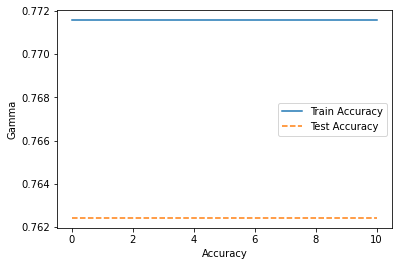

In [18]:
#Gamma별 정확도 그래프로 확인
plt.plot(para_gamma,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_gamma,test_accuracy,linestyle="--",label="Test Accuracy")
plt.xlabel("Accuracy"); plt.ylabel("Gamma")
plt.legend()

### step2: scale 변환

In [19]:
# 125쪽 1
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,age,height,weight,waist,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hct,bt_mch,...,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,bp_judge,pulse_count_judge,bt_hbsa_0,bt_hbsa_1
0,2.354509,-0.218038,-0.104449,0.806395,0.602778,0.068108,-0.889825,1.378143,1.154090,1.238293,...,0.665802,0.530347,-0.173151,-0.211805,-0.046067,-0.022615,1.365706,-0.048326,-0.389751,0.389751
1,2.238859,-0.034328,-0.104449,0.229506,0.047703,0.068108,0.386600,-0.362368,0.320917,1.238293,...,-1.063707,-1.124724,-0.303939,-0.271252,-0.400402,-0.800943,-0.732222,-0.048326,-0.389751,0.389751
2,2.238859,-0.034328,-0.651418,-0.058939,-0.216618,0.068108,-0.857097,-0.820398,-0.684635,-0.872467,...,-0.356181,-0.266539,-0.410947,-0.806278,-0.648436,-0.171991,1.365706,-0.048326,-0.389751,0.389751
3,2.238859,1.435356,0.661307,-0.203161,-0.613100,0.068108,-0.627995,-0.270762,-0.196224,0.534706,...,-0.513409,-0.082642,-0.303939,-0.390147,-0.364968,-0.738048,-0.732222,-0.048326,-0.389751,0.389751
4,2.238859,-0.218038,-0.323237,0.662173,0.919964,-0.961182,-0.464350,-3.018939,-2.092409,-0.168881,...,-2.662193,0.039956,-0.363388,-0.330700,-0.294101,-0.659429,-0.732222,-0.048326,-0.389751,0.389751


In [20]:
# 125쪽 2
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3,random_state = 1234)
df_scaled_train_x, df_scaled_validation_x = train_test_split(df_scaled_train_x, test_size = 3/7,random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (858, 23)
test data X size : (644, 23)


### step2: scale 조절 후 SVC 모델 재실행

In [21]:
# 125쪽 3
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
print("Accuracy on training set:{:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set:{:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))
# 평가 
y_pred=svm_scaled.predict(df_scaled_test_x)
print("Accuracy:{:.3f}".format(svm_scaled.score(df_scaled_train_x,df_train_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:0.797
Accuracy on test set:0.766
Accuracy:0.797
Confusion matrix:
[[490   1]
 [150   3]]


### step2: 새로운 SVC 모델 Parameter 변경

- C: 규제에 대한 강도 변경

In [22]:
# p.126~127
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# c: 규제(0.01, 0..1, 1, 10)
para_c = [10 ** c for c in range(-2, 2)]
for v_C in para_c:
    svm = SVC(C=v_C, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

- C: 규제에 대한 강도 변경 결과

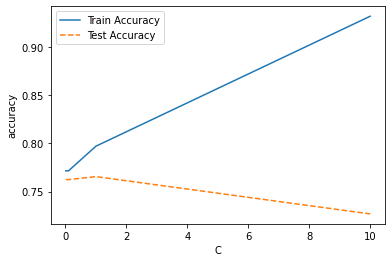

In [23]:
# C별 정확도 테이블
df_accuracy_c.round(3)
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

In [24]:
# 임의로 지정
C = 1

- Gamma: 훈련 샘플이 미치는 영향의 범위를 변경

In [25]:
#p128
#새로운 SVC 모델 파라미터 변경
#Gamma 훈련 샘플이 미치는 영향의 범위를 변경 결과
#train 및 test정확도 결과 저장용
train_accuracy=[];test_accuracy=[]
#gamma: 규제(0.01 , 0.1 , 1, 10)
para_gamma=[10 **gamma for gamma in range(-2,2)]
for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C=2,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
#데이터 테이블로 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['TestAccuracy']=test_accuracy

- Gamma: 훈련 샘플이 미치는 영향의 범위를 변경 결과

### step2: 새로운 SVC 모델 평가

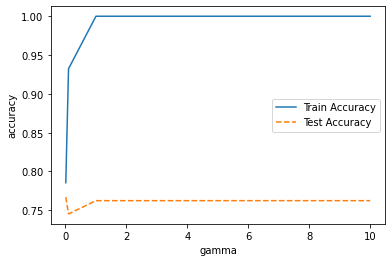

In [26]:
# p 129 아래
# Gamma 별 정확도 테이블
df_accuracy_gamma.round(3)
# Gamma 별 정확도 그래프로 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('gamma')
plt.legend()
# 임의로 지정
gamma = 0.1

### step3: 결론 도출

In [29]:
# p130
# 최종 모델
svc_final = SVC(gamma = 1, C = 1, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)
# 평가
y_pred = svc_final.predict(df_scaled_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}" .format(svc_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f} \n" .format(svc_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n {}" .format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 1.000
Accuracy on test set: 0.762 

Confusion matrix: 
 [[491   0]
 [153   0]]


### step3: 서포트 벡터 머신 Parameter 조정 - 추가

In [28]:
# gridsearchCV 는 생략했습니다